In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
d = load_digits()

In [3]:
dir(d)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
d.data[0].shape

(64,)

In [5]:
d.data[0].shape

(64,)

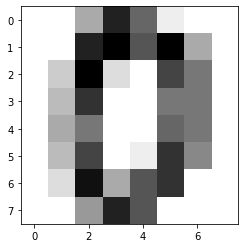

In [6]:
plt.imshow(d.data[0].reshape(8,8),cmap='binary')

<Figure size 432x288 with 0 Axes>

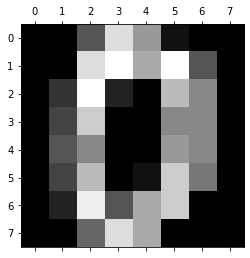

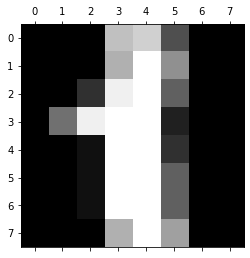

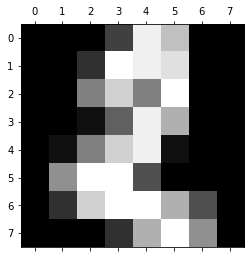

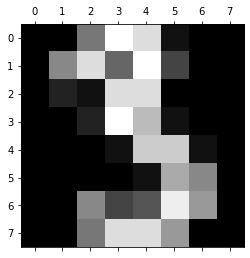

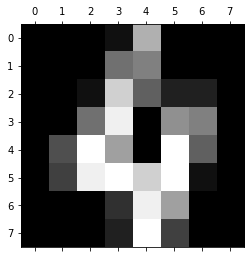

In [7]:
plt.gray()
for i in range(5):
    plt.matshow(d.images[i])

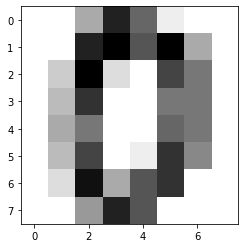

In [8]:
plt.imshow(d.images[0],cmap='binary')

In [9]:
d.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=d.data
y=d.target


In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
iso = IsolationForest(contamination=0.02)
iso.fit(X)
pred=iso.predict(X)
X=X[pred==1]
y=y[pred==1]

In [14]:
X=X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [15]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [16]:
log.fit(X_train,y_train)

LogisticRegression()

In [17]:
log.score(X_test,y_test)

0.8753541076487252

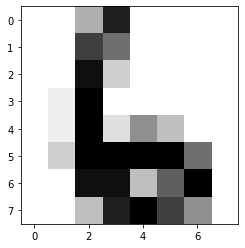

In [18]:
plt.imshow(d.images[67], cmap='binary')

In [19]:
d.target[67]

6

In [20]:
log.predict([d.data[67]])

array([6])

In [21]:
from sklearn.metrics import confusion_matrix

In [27]:
ypred=log.predict(X_test)
cm = confusion_matrix(y_test,ypred)

In [25]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

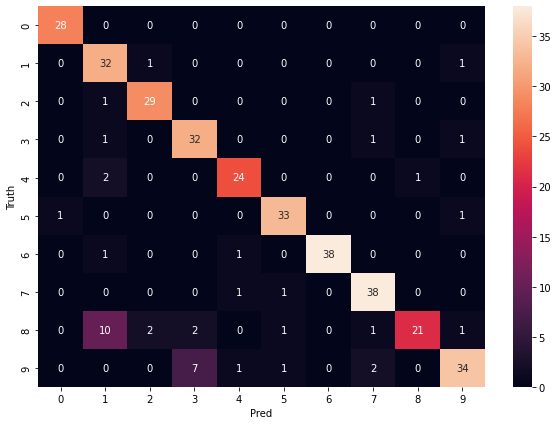

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Pred')
plt.ylabel('Truth')